In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [7]:
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [8]:
churn_data = pd.read_csv('churn.csv')
churn_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


1.  Удаляем лишний столбец 'RowNumber'.
2. Приводим столбцы с маленьким количеством уникальных значений к типу данных — category. Преимущества такого подхода:
Меньшее использование памяти, ускорение операций, понимание данных.

In [10]:
churn_data = churn_data.drop(['RowNumber'], axis=1) # удаляем лишнюю информацию
churn_data['Exited'] = churn_data['Exited'].astype('category') 
#for col in churn_data.columns: 
#    if churn_data[col].nunique() < 10: 
#        churn_data[col] = churn_data[col].astype('category') 


In [11]:
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    1 : 'Exited',
    0 : 'Loyal'
})

In [ ]:
churn_data.info() # проверяем результат.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  object  
 4   Gender           10000 non-null  object  
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  int64   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  int64   
 9   HasCrCard        10000 non-null  int64   
 10  IsActiveMember   10000 non-null  int64   
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  category
dtypes: category(1), float64(2), int64(7), object(3)
memory usage: 947.5+ KB


                                                    #Задание 9.1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [13]:
churn_data['Exited'].value_counts()

Exited
Loyal     7963
Exited    2037
Name: count, dtype: int64

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

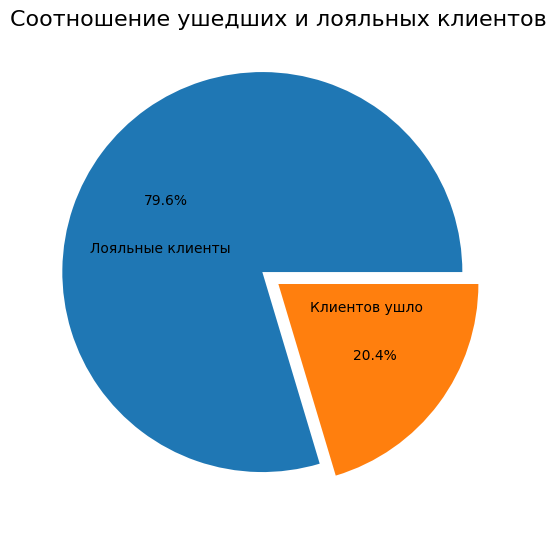

In [14]:
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data['Exited'].value_counts(),
    labels=['Лояльные клиенты', 'Клиентов ушло'],
    autopct='%.1f%%',
    labeldistance = 0.2,
    
    explode = [0.1, 0]
);
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)

                                                               Задание 9.2. 
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [15]:
bal_distribution = churn_data[churn_data['Balance']>2500] # убираем неинтересующие данные

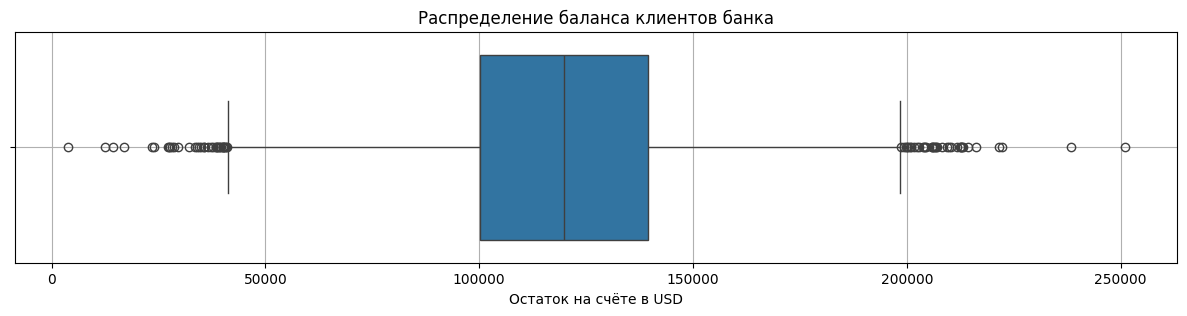

In [16]:
fig = plt.figure(figsize=(15, 3))
boxplot = sns.boxplot(
    data=bal_distribution,
    x='Balance',
    orient='h',
    width=0.8
)
boxplot.set_title('Распределение баланса клиентов банка');
boxplot.set_xlabel('Остаток на счёте в USD');
boxplot.grid()


In [17]:
print('Средний остаток на счёте клиентов: {} USD'.format(round(bal_distribution['Balance'].mean()))) # справочно самопроверка
print('Медиана остатка на счёте клиентов: {} USD'.format(round(bal_distribution['Balance'].quantile()))) # справочно самопроверка

Средний остаток на счёте клиентов: 119827 USD
Медиана остатка на счёте клиентов: 119840 USD


Из графика можно сделать вывод, что медиана остатка на счетах клиентов банка составляет 120 тыс. долларов, практически равна среднему остатку на счетах.
Распределение остатков равномерное, так 25 квантиль находится на отметке 100 тыс. долларов, а 75 квантиль на отметке 140 тыс. долларов.
Также можно сделать выводы, что главный сегмент высокодоходных клиентов банка составляют клиенты с остатком на счетах от 100 до 140 тыс. долларов.

                                                                   9.3. 
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

NameError: name 'x' is not defined

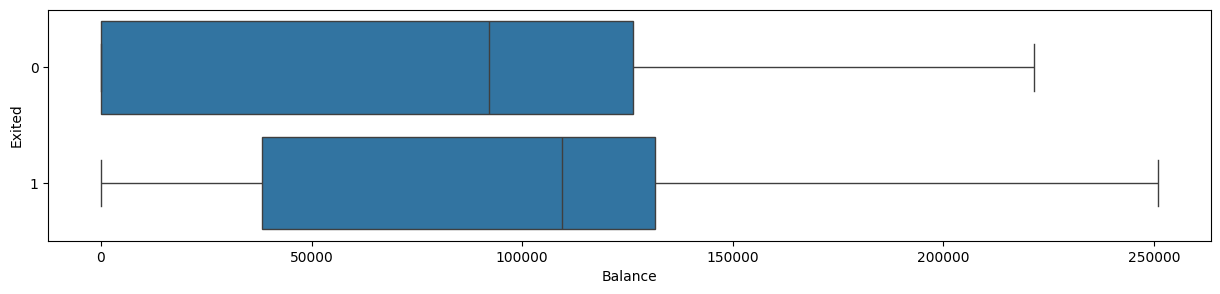

In [ ]:
fig = plt.figure(figsize=(15, 3))
boxplot = sns.boxplot(
    data=churn_data,
    y = 'Exited',
    x = 'Balance',
    orient='h',
    width=0.8

)
boxplot.set_title('Распределение баланса клиентов банка');
boxplot.set_xlabel('Остаток на счёте в USD');
boxplot.set_ylabel('Лояльность клиентов')
boxplot.grid()

Из сравнения остатков на счетах лояльных и ушедших клиентов можно сделать выводы:
* остатки по счетам клиентов, которые ушли, выше остатков лояльных клиентов; (медианные показатели лояльных и ушедших стоят на уровне 90 и 110 тыс. USD).
* высокий уровень 25й квантили среди ушедших клиентов указывает на то, что большая часть клиентов связана с инвестированием средств и размещает относительно высокие суммы.

Возможно, потеря клиентов связана с низкой инвестиционной привлекательностью банка, а именно либо процентной ставкой по вкладам или несвоевременной выплатой процентного дохода по вкладам.

                                                             9.4. 
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

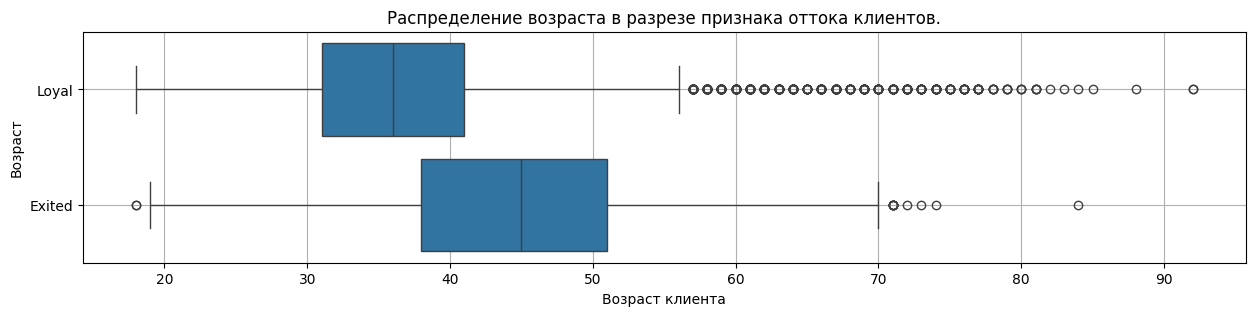

In [19]:
fig = plt.figure(figsize=(15, 3))
boxplot = sns.boxplot(
    data=churn_data,
    y = 'Exited',
    x = 'Age',
    orient='h',
    width=0.8
)
boxplot.set_title('Распределение возраста в разрезе признака оттока клиентов.');
boxplot.set_xlabel('Возраст клиента');
boxplot.set_ylabel('Возраст')
boxplot.grid()

Судя по представленному графику, можно сделать следующие выводы:
1. Основная группа лояльных клиентов являются клиенты возрастной категории 30-40 лет. 
2. Большое количество выбросов среди лояльных клиентов в диапазоне 55-95 лет может свидетельствовать, что это невостребованные вклады умерших людей, права на которые не заявлены наследниками.
3. Основная часть ушедших клиентов соответствуют возрастной категории 40+, что может свидетельствовать о том, что банк покинули люди, добившиеся определенного уровня и желающие получать пассивный доход от сбережений.

Банку необходимо принять меры по инвестиционной привлекательности вкладов.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [20]:
fig = px.scatter(
    data_frame=churn_data, 
    x = 'CreditScore', 
    y = 'EstimatedSalary', 
    color='Exited', 
    width=1200,
    height=600
)
fig.show()


Из представленных данных отчетливо видно, что максимальный кредитный рейтинг лояльных клиентов присвоен всем категориям доходности (отчетливая вертикальная полоса вдоль рейтинга 850), однако про ушедших клиентов такое сказать невозможно, отчетливо видно, что ушли клиенты с высоким уровнем дохода, которые не получили кредитный рейтинг выше 400 (лояльных клиентов в зоне ниже 400 нет).

Основная масса клиентов, вне зависимости от лояльности, сконцентрирована в диапазоне рейтинга со значениями 520-750.

Возможно, в банке установлена несовершенная система определения кредитного рейтинга (на это указывает явное отсутствие ранжирования клиентов по уровню дохода), которая не позволяет объективно определить платежеспособность клиентов, в связи с чем платежеспособные клиенты не получают достаточного кредитного обеспечения.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Text(0.5, 1.0, 'Соотношение ушедших и лояльных \n клиентов женщины')

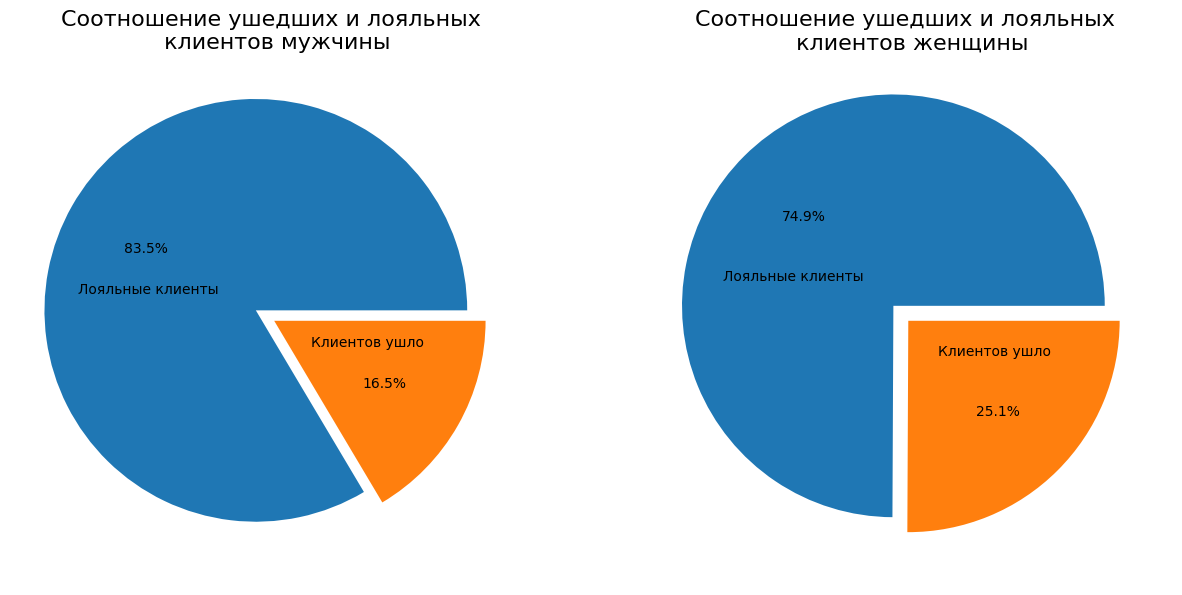

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))


axes[0].pie(
    churn_data[churn_data['Gender']=='Male']['Exited'].value_counts(),
    labels=['Лояльные клиенты', 'Клиентов ушло'],
    autopct='%.1f%%',
    labeldistance = 0.2,
    
    explode = [0.1, 0]
);
axes[0].set_title('Соотношение ушедших и лояльных \n клиентов мужчины', fontsize=16)

axes[1].pie(
    churn_data[churn_data['Gender']=='Female']['Exited'].value_counts(),
    labels=['Лояльные клиенты', 'Клиентов ушло'],
    autopct='%.1f%%',
    labeldistance = 0.2,
    
    explode = [0.1, 0]
);
axes[1].set_title('Соотношение ушедших и лояльных \n клиентов женщины', fontsize=16)

Из графика видно, что всего 16,5% клиентов-мужчин уходит, однако женщин в этом показателе значительно больше - 25,1%.

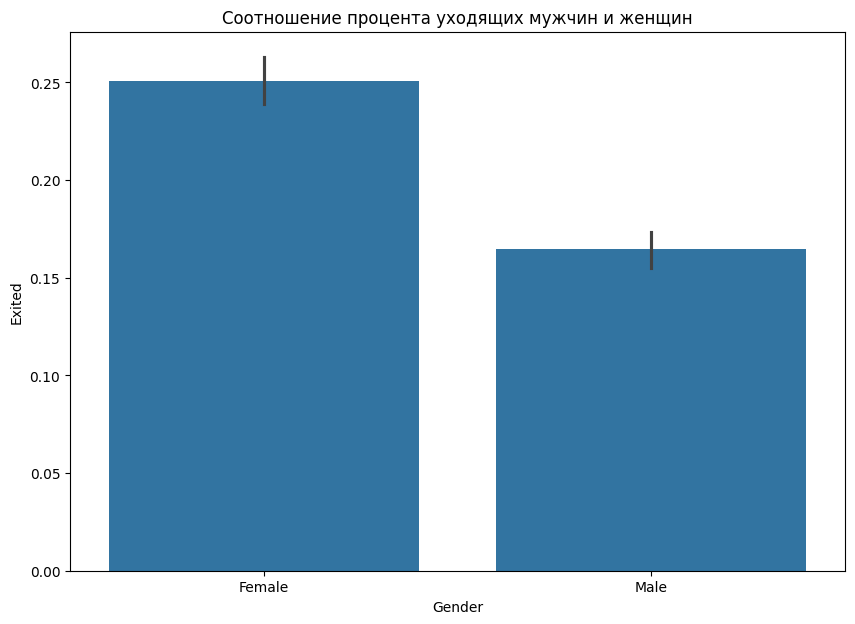

In [22]:
churn_data = pd.read_csv('churn.csv')
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    x='Gender',
    y='Exited'
)
barplot.set_title('Соотношение процента уходящих мужчин и женщин');

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [23]:
grouped_row = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

In [24]:
for i in range(len(grouped_row['Exited'])):
    if grouped_row['Exited'][i] == 1:
        grouped_row['Exited'][i] = 'Клиент ушёл'
    else:
        grouped_row['Exited'][i] = 'Лояльный клиент'

C:\Users\HP\AppData\Local\Temp\ipykernel_3224\1980340013.py:5: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\HP\AppData\Local\Temp\ipykernel_3224\1980340013.py:5: FutureWarning:

Setting an item of incompatible dtype is deprecated a

In [25]:
fig = px.bar(
    data_frame=grouped_row, 
    x="NumOfProducts", 
    y="CustomerId", 
    color='Exited', 
    orientation='v', 
    height=500, 
    width=1000, 
    title='Зависимость оттока от числа приобретенных услуг', 
    barmode = 'group',
)
fig.show()

Из графика видно, что основная часть клиентов банка уходит, получив всего лишь 1 продукт, следовательно либо клиентов не устраивает качество получаемого продукта, либо банк не удовлетворяет потребности клиентов в других продуктах, а именно:
1. Возможно другие продукты не конкурентноспособные и их условия не устраивают клиентов;
2. Возможно отдел продаж некачественно информирует клиентов о существовании других продуктов.

Однако, судя по тому, что анализ проводится по клиентам, имеющим депозитные счета (что в свою очередь является продуктом банка), а также опираясь на анализ выше, можно сделать вывод: в основном ушли клиенты инвестировавшие свободные средства в депозиты, следовательно условия по депозитам не привлекательны для инвесторов.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [26]:
a_e = churn_data.groupby('IsActiveMember', as_index=False)['Exited'].mean()
a_e['IsActiveMember'] = ['Неактивные клиенты', 'Активные клиенты']

Text(0, 0.5, 'Процент ушедших')

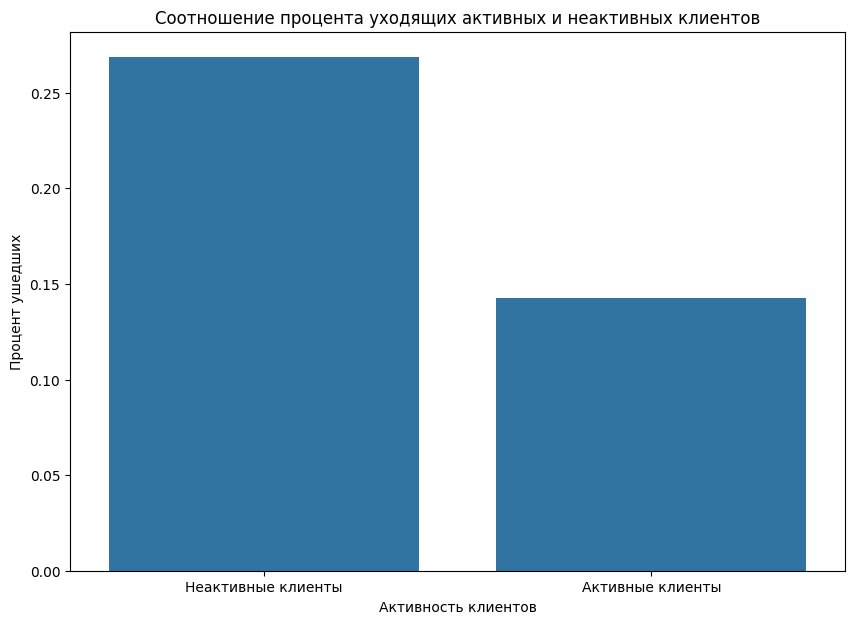

In [27]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data = a_e,
    x = 'IsActiveMember',
    y = 'Exited',
)
barplot.set_title('Соотношение процента уходящих активных и неактивных клиентов');
barplot.set_xlabel('Активность клиентов')
barplot.set_ylabel('Процент ушедших')


Из сравнения видно, что доля ушедших неактивных клиентов выше в 2 раза, чем активных клиентов.
Предположим, что статус активного клиента банк устанавливает клиентам, у которых активно совершаются операции по счетам, тогда данный показатель подтверждает выдвинутую ранее гипотезу, что из банка уходят клиенты размещающие свои средства в виде вкладов на долгосрочный период с целью получения процентного дохода.
Следовательно условия по вкладам не удовлетворяют клиентов

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [28]:
country_data = churn_data.groupby('Geography', as_index=False)['Exited'].mean()

fig = px.choropleth(
    data_frame=country_data, 
    locations="Geography", 
    locationmode = "country names", 
    color="Exited", 
    range_color=[0, 0.4],
    title='Global Spread of COVID-19', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds' 
)
fig.show()

Из представленных данных видно, что клиенты проживающие в германии чаще всего покидают банк, судя по данным их внешних источников из представленных стран жители германии самые состоятельные, так ВВП на 1 человека в Германии составляет 46 тыс. долларов, во Франции 38тыс. долларов, и Испании 27 тыс. долларов.
Что очередной раз подтверждает низкую инвестиционную привлекательность банка, банку следует пересмотреть условия вкладов

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [29]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


In [30]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

In [31]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Excellent


In [32]:
churn_data['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [33]:
pivot_data = churn_data.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure')

In [34]:
pivot_data

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


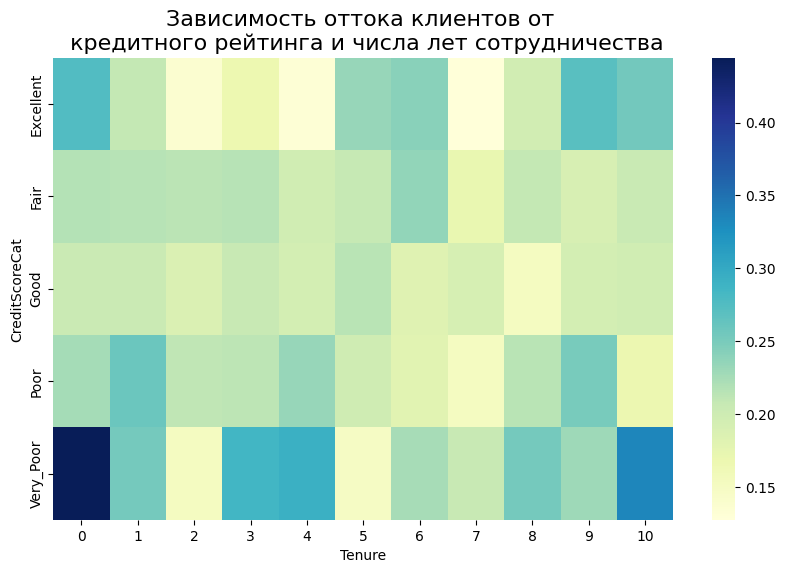

In [35]:
fig = plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(data=pivot_data, cmap='YlGnBu')
heatmap.set_title('Зависимость оттока клиентов от \n кредитного рейтинга и числа лет сотрудничества', fontsize=16);

Из тепловой карты видно, что чаще всего банк покидают клиенты с низким уровнем доходности, которые либо недавно начали пользоваться услугами банка, либо с банком более 10 лет. Аналогичная ситуация с высокодоходными клиентами.
Такая ситуация может возникнуть по нескольким причинам:
1. Банк имеет низкие ставки по вкладам, высокие ставки интересны как малосостоятельным клиентам (пассивное повышение личного дохода), так и обеспеченным клиентам (инвестирование неиспользуемых средств);
    - на это также указывают интервалы "выхода" клиентов, средний срок инвестиций 3-5 лет, максимальный 10 лет. Следовательно, по истечению срока инвестирования клиенты изымают свои активы.
2. Неправильно работа системы предположения дохода населения и его кредитного рейтинга.
    возможно, из-за неверного анализа доходности клиента и некачественного присвоения кредитного рейтинга существует вероятность проведения анализа неверных данных, в результате чего будут неверные выводы;
3. Недобросовестная работа подразделения сопровождения клиентов, а именно возможны ситуации, когда подразделение продаж привлекает новых клиентов, но они уходят из-за низкого сервиса обслуживания (большой уход клиентов на нулевом годе обслуживания по всем категориям кредитного рейтинга).
4. Возможно недоброжелательное отношение сотрудников к клиентам с низким рейтингом, в результате чего клиенты уходят из банка в течении первого года обслуживания.

Сильная сторона банка — это клиенты со "средним" и "выше среднего" уровнем достатка, такие клиенты меньше всего покидают банк. 
\